# OpenAI CliffWalking-v0

#### Necessary imports

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import gym.spaces as spaces
import time

#### Setup

In [2]:
env = gym.make("CliffWalking-v0", render_mode="ansi")
env.reset()
gammas = [0, 0.1, 0.5, 0.75, 0.99]

Useful default parameters for the environment:
- self.shape = (4, 12)
- self.nS = np.prod(self.shape) 
- self.nA = 4
- self.P[s][a] is a tuple of (probability, nextstate, reward, done)

### Agent 1: Policy iteration

Policy evaluation

In [3]:
def policyEval (policy, env, gamma):
    # initialize value function
    Value = np.zeros(env.nS)
    delta = 1 # arbitrary value
    i = 0
    while delta > 0 and i<1e4:
        delta = 0
        for s in range(env.nS):
            val = 0
            tempVal = Value[s]
            a = policy[s]
            for prob, nextState, reward, isTerminal in env.P[s][a]:
                if isTerminal:
                    val += 0
                else:
                    val += prob * (reward + gamma * Value[nextState])
            Value[s] = val
            delta = max(delta, abs(tempVal - Value[s]))
            if delta < 1e-6:
                i += 1
    return Value

Policy improvement

In [4]:
def policyImprove (policy, env, gamma):
    # stop = True
    for s in range(env.nS):
        stop = True
        final = True
        Value = policyEval(policy, env, gamma)
        # print(Value)
        stateValues = []
        max_val = -np.inf
        currAction = policy[s]
        for a in range(env.nA):
            val = 0
            for prob, nextState, reward, isTerminal in env.P[s][a]:
                if isTerminal:
                    val += 0
                else:
                    val += prob * (reward + gamma * Value[nextState])
            stateValues.append(val)
        maxVal = max(stateValues)
        policy[s] = stateValues.index(maxVal)
        if policy[s] != currAction:
            stop = False
        if s == 47:
            final = True
    if stop or final:
        valSum = 0
        for s in range(env.nS):
            valSum += Value[s]
        return policy, Value, valSum

Test

In [5]:
valSums = {} # one array per gamma
policies = {}
values = {}
itsTaken = {}
for gamma in gammas:
    policy = np.zeros(env.nS, dtype=int)
    i = 0
    itsGamma = 0 # iterations for each gamma
    valSumList = []
    while True:
        itsGamma += 1
        policy,value,sum = policyImprove(policy, env, gamma)
        policies[gamma] = policy
        values[gamma] = value
        valSumList.append(sum)
        if len(valSumList) > 1:
            if abs(valSumList[-1] - valSumList[-2]) < 1e-3:
                i += 1
            else:
                i = 0
            if i == 10:
                valSums[gamma] = valSumList
                itsTaken[gamma] = itsGamma
                break

for gamma in gammas:
    print("Gamma: ", gamma)
    print("Policy: ", policies[gamma])
    print("Iterations: ", itsTaken[gamma])
    if gamma != gammas[-1]:
        print()

Gamma:  0
Policy:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 1 1]
Iterations:  12

Gamma:  0.1
Policy:  [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 1]
Iterations:  14

Gamma:  0.5
Policy:  [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 1]
Iterations:  22

Gamma:  0.75
Policy:  [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 1]
Iterations:  24

Gamma:  0.99
Policy:  [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 1]
Iterations:  24


Plot

<Figure size 640x480 with 0 Axes>

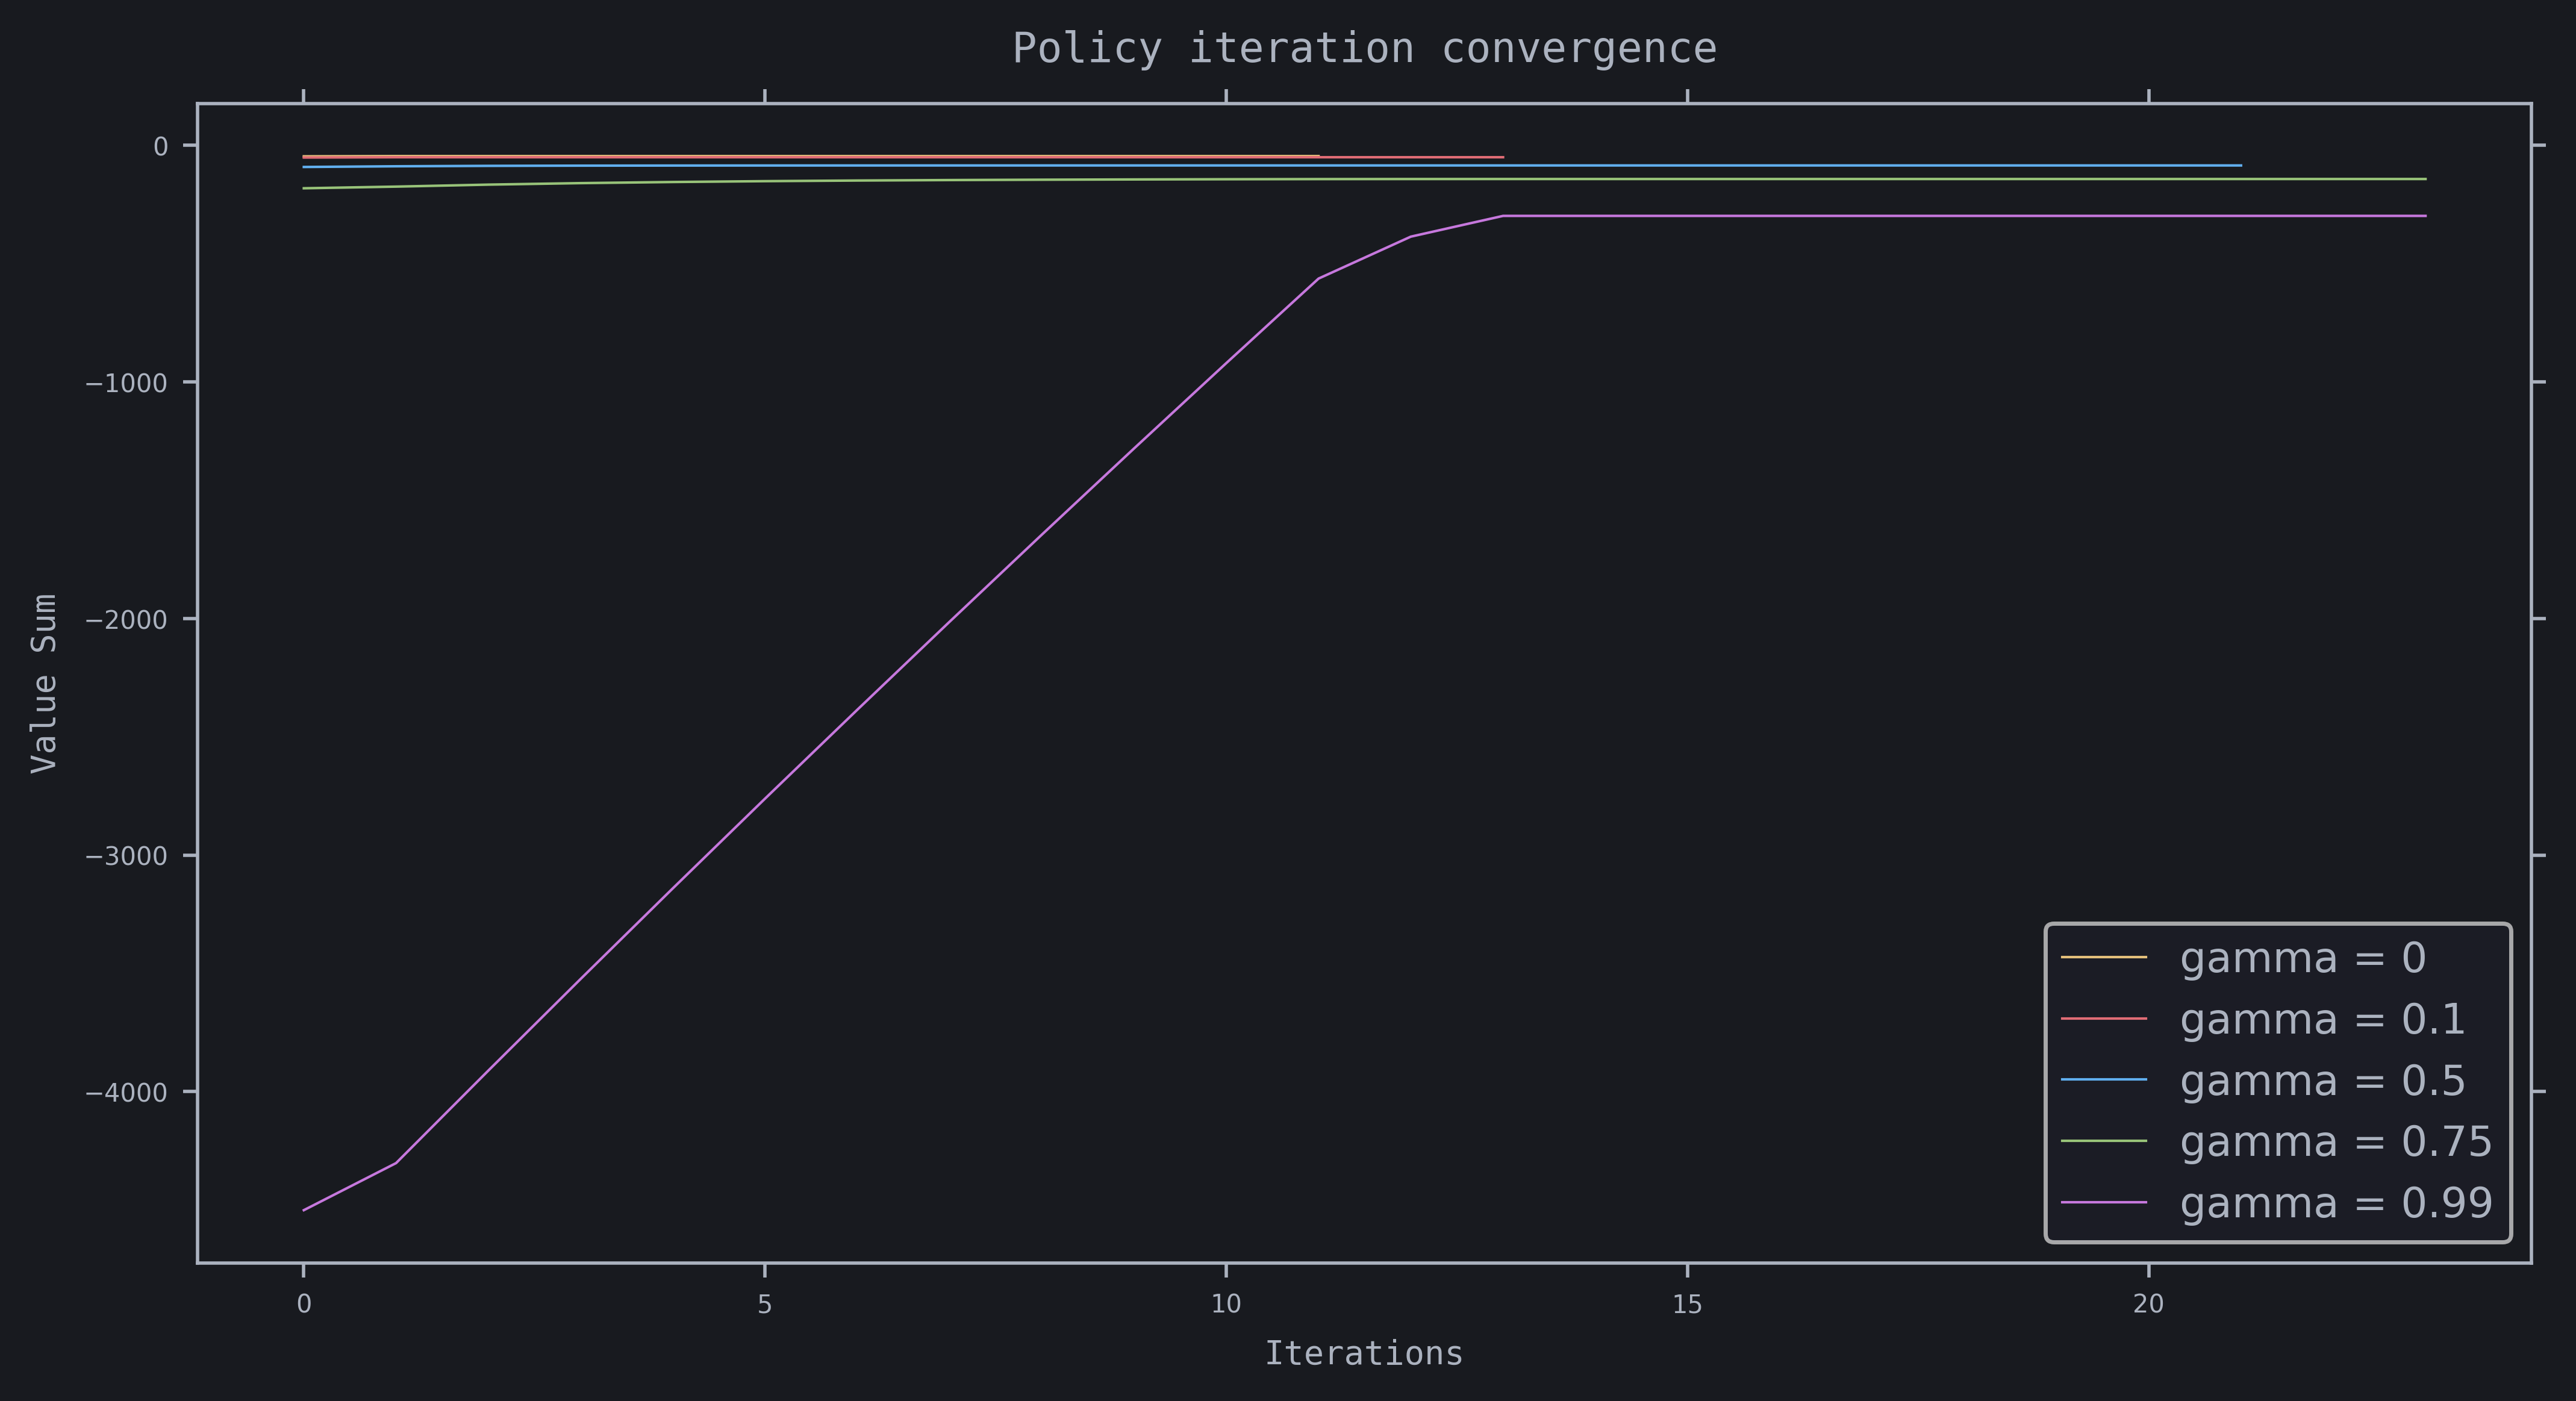

In [31]:
plt.clf()
plt.figure(figsize=(10, 5), dpi = 500, facecolor='#181A1F')
ax = plt.axes()
ax.set_facecolor('#181A1F')
plt.title("Policy iteration convergence", fontsize=10, color='#abb2bf', font = 'Monospace', pad = 10)
plt.xlabel("Iterations", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plt.ylabel("Value Sum", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plotColors = ["#e5c07b", "#e06c75", "#61afef", "#98c379", "#c678dd"]
for gamma in gammas:
    plt.plot(valSums[gamma], label="gamma = " + str(gamma), color=plotColors[gammas.index(gamma)], linewidth=0.6)
plt.tick_params(axis='both', which='major', labelsize=6)
ax.spines['bottom'].set_color('#abb2bf')
ax.spines['top'].set_color('#abb2bf')
ax.spines['left'].set_color('#abb2bf')
ax.spines['right'].set_color('#abb2bf')
ax.tick_params(axis='x', colors='#abb2bf')
ax.tick_params(axis='y', colors='#abb2bf')
plt.rcParams['axes.facecolor'] = '#1c1d27'
plt.rcParams['axes.titlecolor'] = '#abb2bf'
plt.rcParams['axes.edgecolor'] = '#abb2bf'
plt.rcParams['axes.labelcolor'] = '#abb2bf'
plt.rcParams['figure.facecolor'] = '#1c1d27'
plt.rcParams['legend.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.color'] = '#1bb2bf'
plt.rcParams['ytick.color'] = '#1bb2bf'
plt.rcParams['text.color'] = '#abb2bf'
plt.rcParams['xtick.labelcolor'] = '#abb2bf'
plt.rcParams['ytick.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True
plt.legend()
plt.show()

The values did not converge at gamma = 1, hence gamma = 0.99 was used for this plot instead. The convergence is shown in the above plot. Do note that policy iteration is made to stop running when the sum of state values changes insignificantly for 10 consecutive iterations. The change in gamma does not affect the optimal policy learnt, but does affect state values and how many iterations are required to converge.

### Agent 2: Value Iteration

setup

In [ ]:
env.reset()

value iteration

In [80]:
def valueIteration(env, gamma):
    V = np.zeros(env.nS, dtype=float)
    P = np.zeros(env.nS, dtype=int)
    itsTaken = 0
    valsums = []
    for s in range(env.nS):
        delta = np.inf
        i = 0
        while delta > 1e-6 and i<10:
            itsTaken += 1
            valsum = 0
            for s_ in range(env.nS):
                valsum += V[s_]
            valsums.append(valsum)
            delta = 0
            tempVal = V[s]
            stateValues = []
            for a in range(env.nA):
                for prob, nextState, reward, isTerminal in env.P[s][a]:
                    if isTerminal:
                        val = 0
                    else:
                        val = prob * (reward + gamma * V[nextState])
                stateValues.append(val)
            V[s] = max(stateValues)
            P[s] = stateValues.index(max(stateValues))
            delta = max(delta, abs(tempVal - V[s]))
            if delta < 1e-6:
                i += 1
            else:
                i = 0

    return P, V, valsums, itsTaken

Test

In [78]:
VI_policies = {}
VI_values = {}
VI_itsTaken = {}
VI_valsums = {}
for gamma in gammas:
    policy, value, valsum, itsTaken = valueIteration(env, gamma)
    VI_policies[gamma] = policy
    VI_values[gamma] = value
    VI_itsTaken[gamma] = itsTaken
    VI_valsums[gamma] = valsum
for gamma in gammas:
    print("Gamma: ", gamma)
    print("Policy: ", VI_policies[gamma])
    print("Iterations: ", VI_itsTaken[gamma])
    if gamma != gammas[-1]:
        print()

Gamma:  0
Policy:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 1 1]
Iterations:  93

Gamma:  0.1
Policy:  [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 1]
Iterations:  94

Gamma:  0.5
Policy:  [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 1]
Iterations:  94

Gamma:  0.75
Policy:  [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 1]
Iterations:  94

Gamma:  0.99
Policy:  [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 1]
Iterations:  94


Plot

<Figure size 640x480 with 0 Axes>

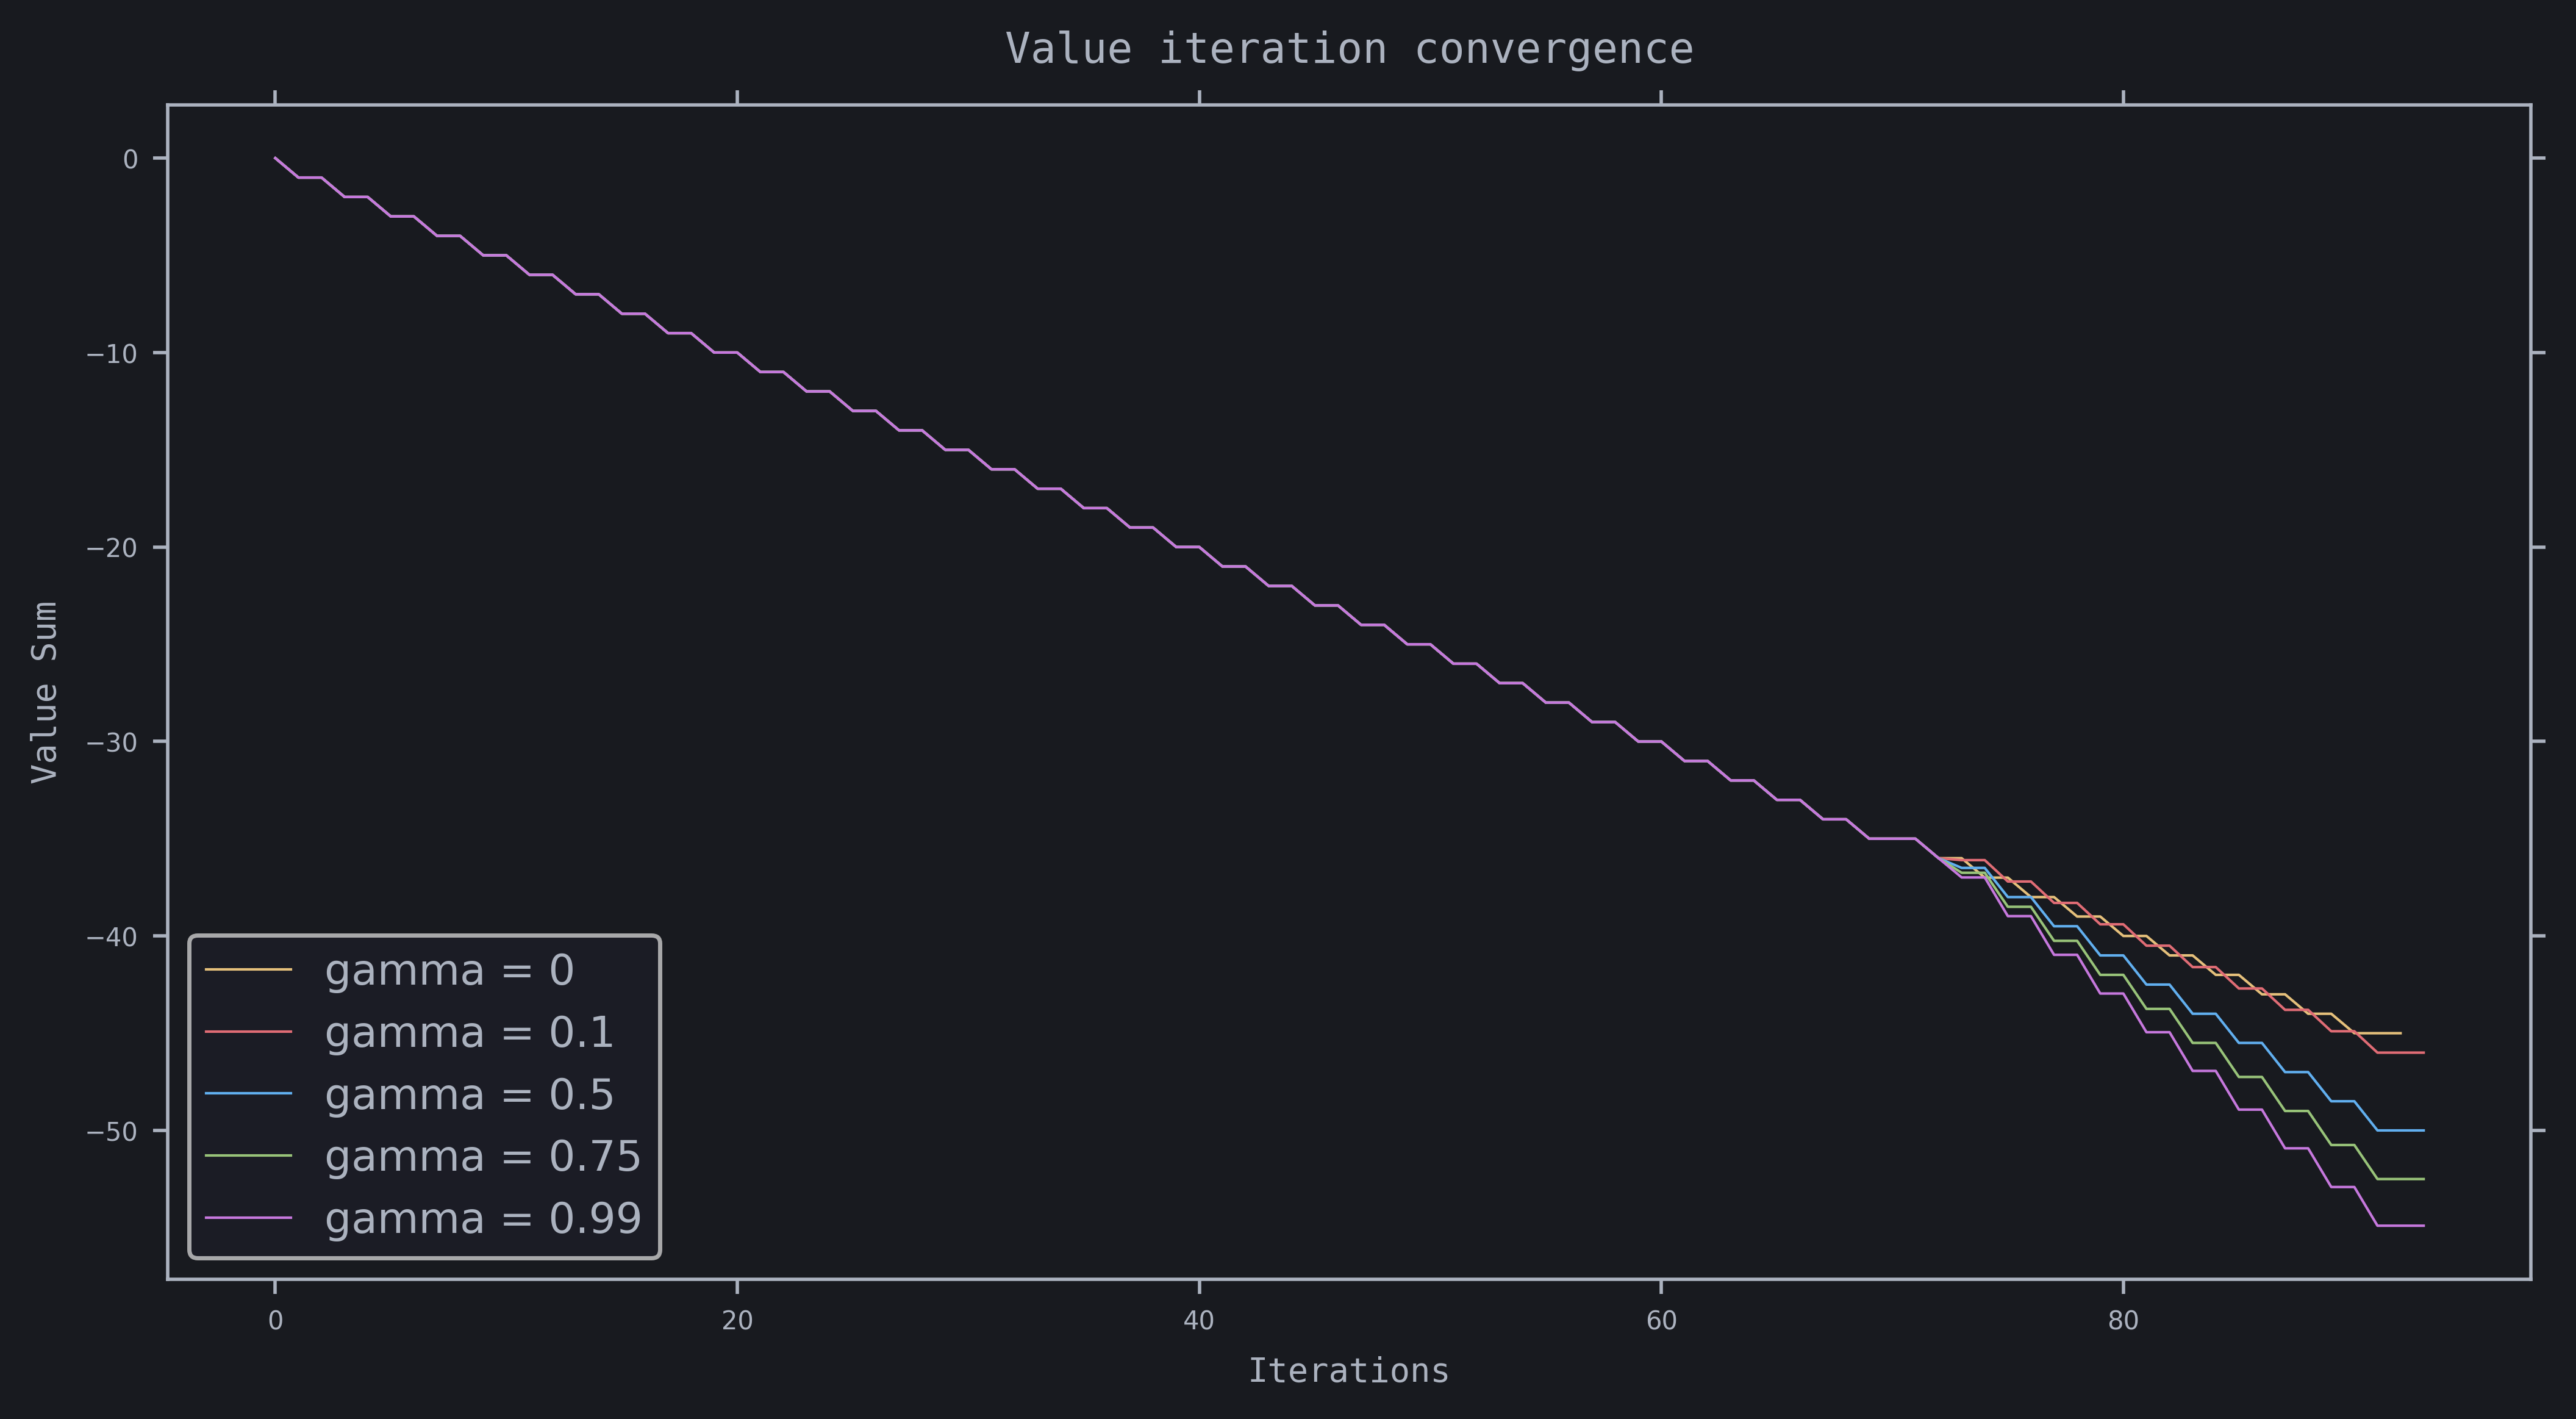

In [79]:
plt.clf()
plt.figure(figsize=(10, 5), dpi = 500, facecolor='#181A1F')
ax = plt.axes()
ax.set_facecolor('#181A1F')
plt.title("Value iteration convergence", fontsize=10, color='#abb2bf', font = 'Monospace', pad = 10)
plt.xlabel("Iterations", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plt.ylabel("Value Sum", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plotColors = ["#e5c07b", "#e06c75", "#61afef", "#98c379", "#c678dd"]
for gamma in gammas:
    plt.plot(VI_valsums[gamma], label="gamma = " + str(gamma), color=plotColors[gammas.index(gamma)], linewidth=0.6)
plt.tick_params(axis='both', which='major', labelsize=6)
ax.spines['bottom'].set_color('#abb2bf')
ax.spines['top'].set_color('#abb2bf')
ax.spines['left'].set_color('#abb2bf')
ax.spines['right'].set_color('#abb2bf')
ax.tick_params(axis='x', colors='#abb2bf')
ax.tick_params(axis='y', colors='#abb2bf')
plt.rcParams['axes.facecolor'] = '#1c1d27'
plt.rcParams['axes.titlecolor'] = '#abb2bf'
plt.rcParams['axes.edgecolor'] = '#abb2bf'
plt.rcParams['axes.labelcolor'] = '#abb2bf'
plt.rcParams['figure.facecolor'] = '#1c1d27'
plt.rcParams['legend.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.color'] = '#1bb2bf'
plt.rcParams['ytick.color'] = '#1bb2bf'
plt.rcParams['text.color'] = '#abb2bf'
plt.rcParams['xtick.labelcolor'] = '#abb2bf'
plt.rcParams['ytick.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True
plt.legend(loc='lower left')
plt.show()

Here, the optimal policy is the same regardless of gamma (except at gamma=0). Value iteration takes more iterations to converge but takes lesser time to compute than Policy iteration.

Confused agent

In [82]:
env.reset()
def randomAgent(env, gamma):
    V = np.zeros(env.nS, dtype=float)
    P = np.zeros(env.nS, dtype=int)
    # for each state, pick a random action
    for s in range(env.nS):
        P[s] = np.random.randint(env.nA)
    # calculate the value of this policy
    for s in range(env.nS):
        val = 0
        for prob, nextState, reward, isTerminal in env.P[s][P[s]]:
            if isTerminal:
                val += 0
            else:
                val += prob * (reward + gamma * V[nextState])
        V[s] = val
    valsum = 0
    for s in range(env.nS):
        valsum += V[s]
    return P, V, valsum

Test

In [83]:
# run the random agent 100 times
Random_valsums = {}
for gamma in gammas:
    valsums = []
    for i in range(100):
        policy, value, valsum = randomAgent(env, gamma)
        valsums.append(valsum)
    Random_valsums[gamma] = valsums

Plot

<Figure size 640x480 with 0 Axes>

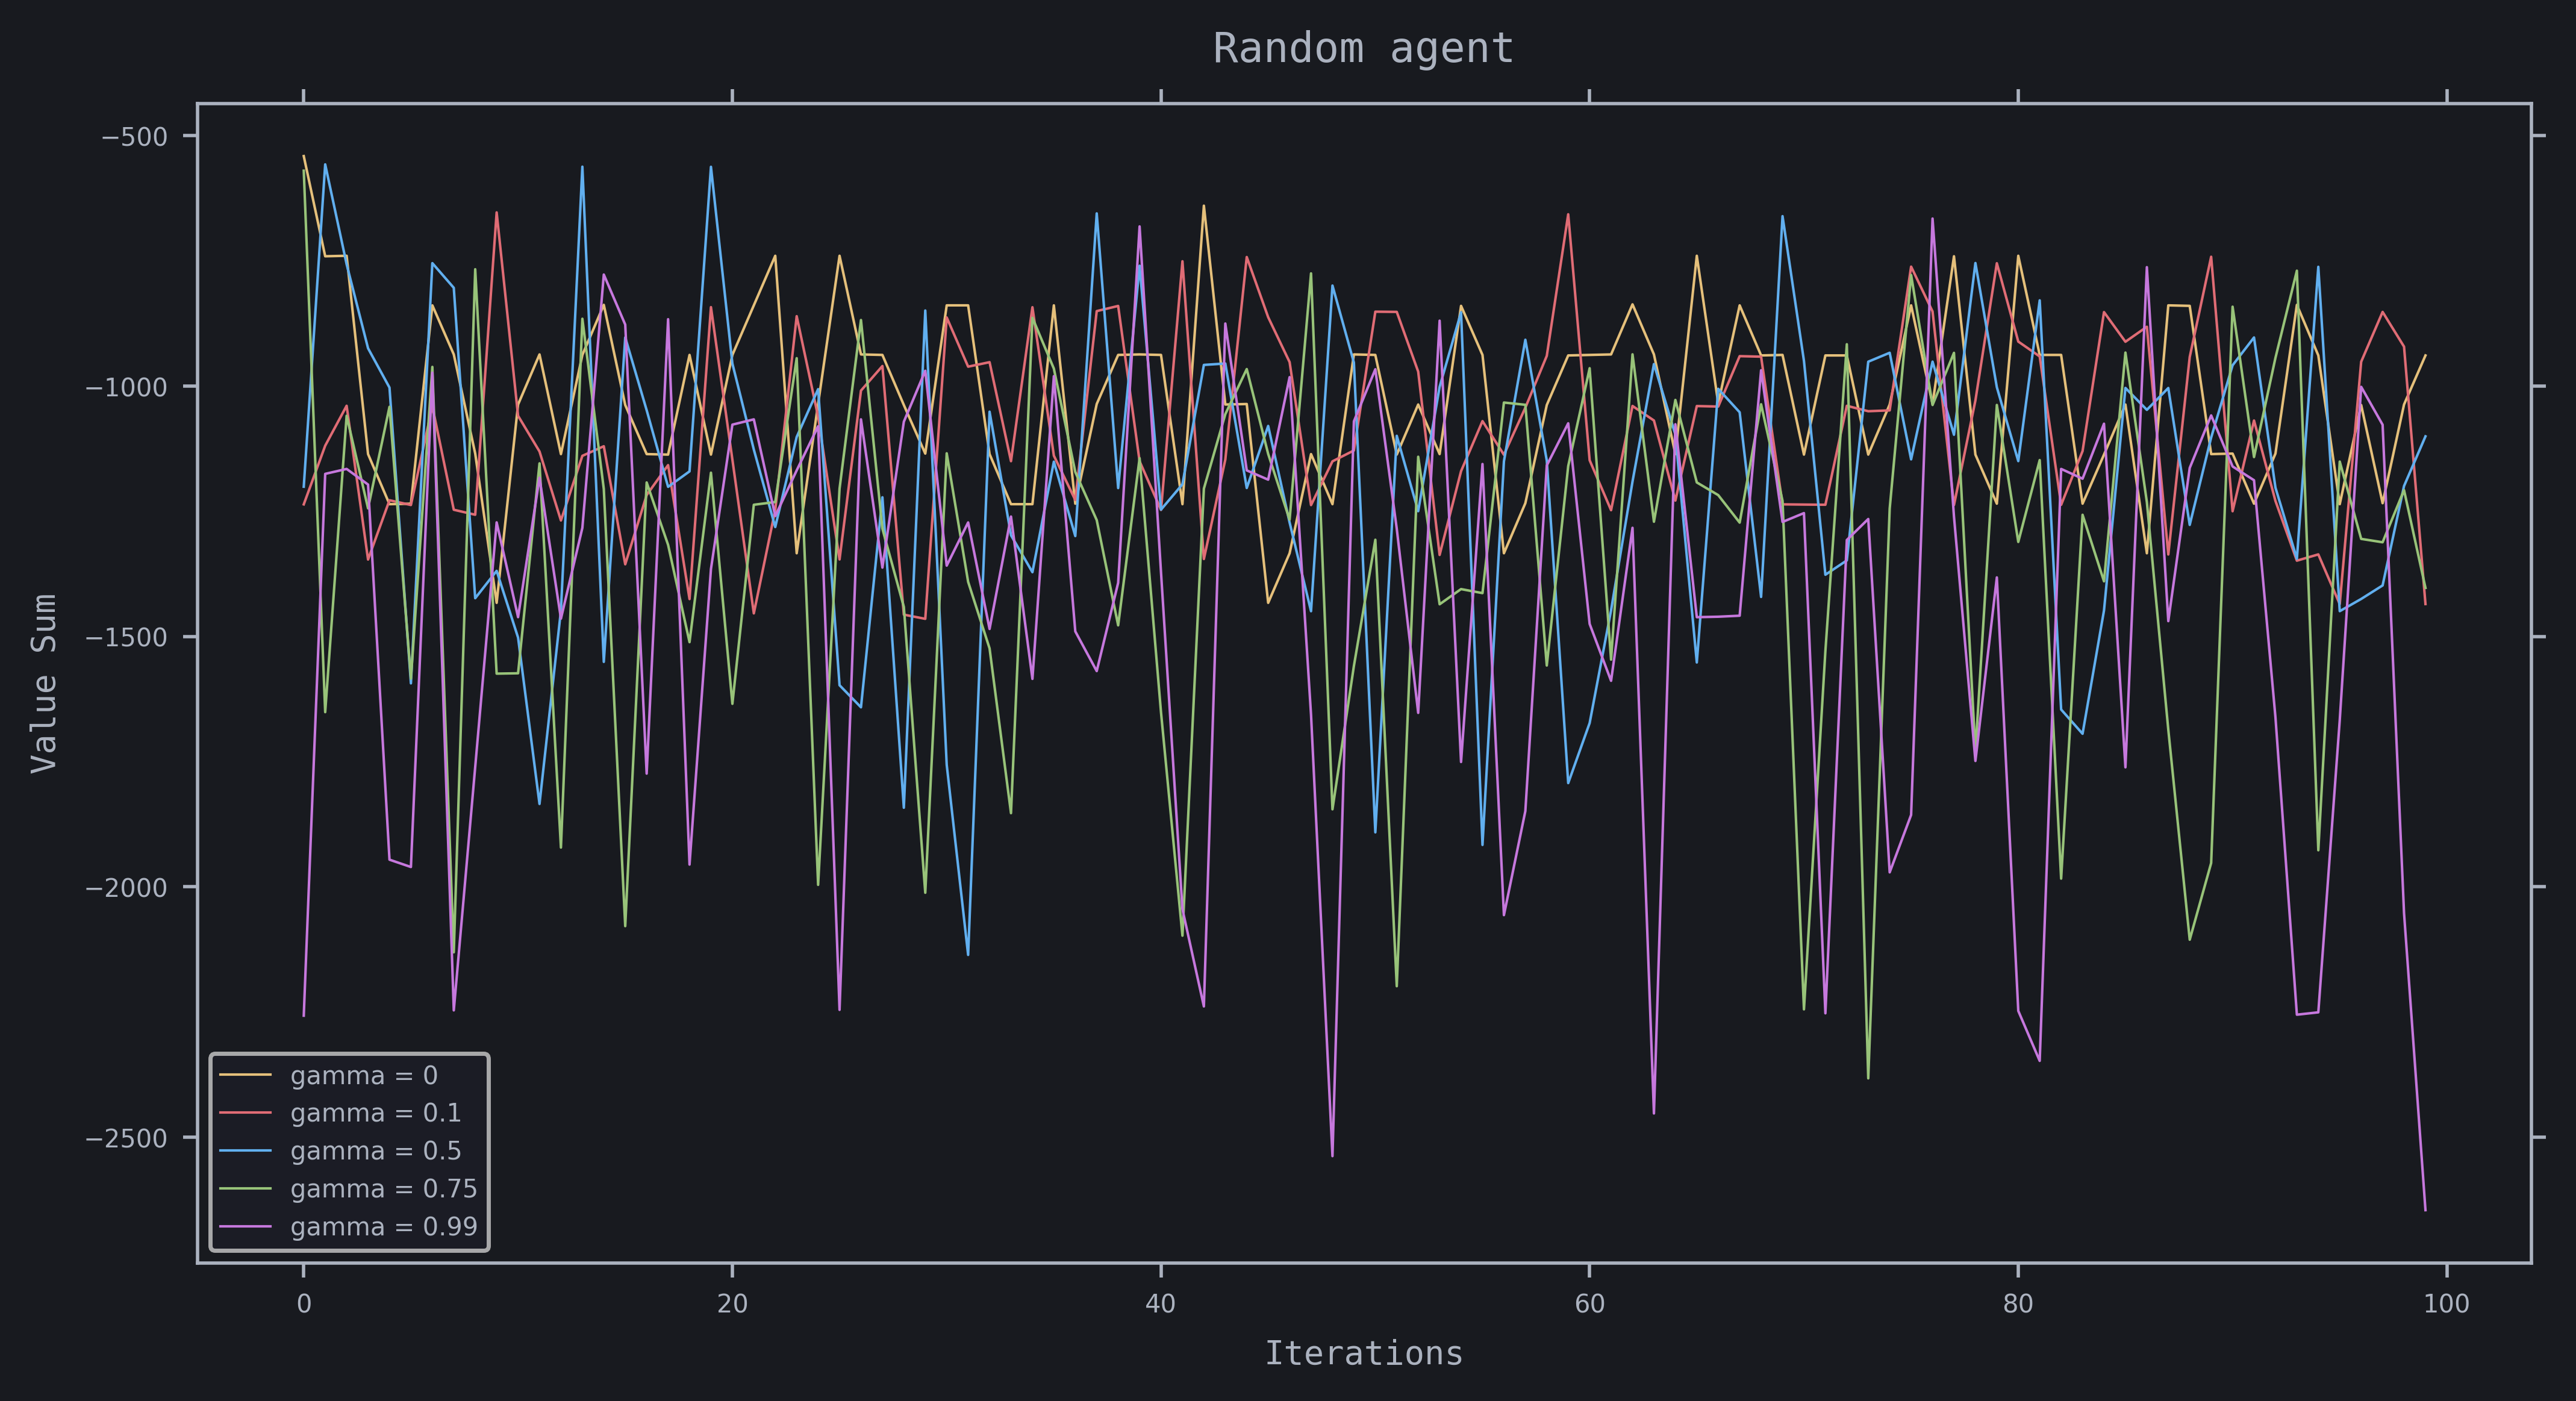

In [85]:
plt.clf()
plt.figure(figsize=(10, 5), dpi = 500, facecolor='#181A1F')
ax = plt.axes()
ax.set_facecolor('#181A1F')
plt.title("Random agent", fontsize=10, color='#abb2bf', font = 'Monospace', pad = 10)
plt.xlabel("Iterations", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plt.ylabel("Value Sum", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plotColors = ["#e5c07b", "#e06c75", "#61afef", "#98c379", "#c678dd"]
for gamma in gammas:
    plt.plot(Random_valsums[gamma], label="gamma = " + str(gamma), color=plotColors[gammas.index(gamma)], linewidth=0.6)
plt.tick_params(axis='both', which='major', labelsize=6)
ax.spines['bottom'].set_color('#abb2bf')
ax.spines['top'].set_color('#abb2bf')
ax.spines['left'].set_color('#abb2bf')
ax.spines['right'].set_color('#abb2bf')
ax.tick_params(axis='x', colors='#abb2bf')
ax.tick_params(axis='y', colors='#abb2bf')
plt.rcParams['axes.facecolor'] = '#1c1d27'
plt.rcParams['axes.titlecolor'] = '#abb2bf'
plt.rcParams['axes.edgecolor'] = '#abb2bf'
plt.rcParams['axes.labelcolor'] = '#abb2bf'
plt.rcParams['figure.facecolor'] = '#1c1d27'
plt.rcParams['legend.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.color'] = '#1bb2bf'
plt.rcParams['ytick.color'] = '#1bb2bf'
plt.rcParams['text.color'] = '#abb2bf'
plt.rcParams['xtick.labelcolor'] = '#abb2bf'
plt.rcParams['ytick.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True
plt.legend(loc='lower left', prop={'size': 6})
plt.show()

Clearly, policy iteration and value iteration perform better than random policies.